In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.graphics.tsaplots import plot_accf_grid
from statsmodels.tsa.stattools import ccf

In [2]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri, numpy2ri, default_converter

np_cv_rules = default_converter + numpy2ri.converter

In [3]:
MTS = importr('MTS')
rstats = importr('stats')

#### Example 13.5

In [4]:
n = 200
phi = 0.99

In [5]:
x = sm.tsa.ArmaProcess.from_coeffs([phi], []).generate_sample(n)
y = sm.tsa.ArmaProcess.from_coeffs([phi], []).generate_sample(n)

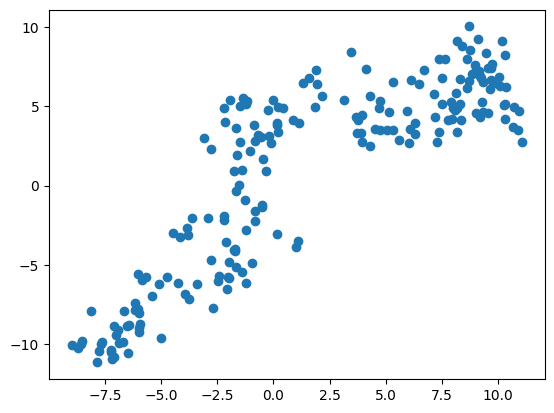

In [6]:
fig, ax = plt.subplots()
ax.scatter(x, y);

In [7]:
fit1 = sm.OLS(y, sm.add_constant(x)).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     538.8
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           2.11e-58
Time:                        16:43:50   Log-Likelihood:                -511.26
No. Observations:                 200   AIC:                             1027.
Df Residuals:                     198   BIC:                             1033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6021      0.230     -2.617      0.010      -1.056      -0.148
x1             0.8698      0.037     23.212      0.000       0.796       0.944
==============================================================================
Omnibus:                       13.426   Durbin-Watson:                   0.170
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.558
Skew:                           0.593   Prob(JB):                      0.00114
Kurtosis:                       2.531   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
fit2 = sm.OLS(np.diff(y), sm.add_constant(np.diff(x))).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                  0.002963
Date:                Wed, 14 Jun 2023   Prob (F-statistic):              0.957
Time:                        16:43:50   Log-Likelihood:                -275.89
No. Observations:                 199   AIC:                             555.8
Df Residuals:                     197   BIC:                             562.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0374      0.069     -0.542      0.589      -0.173       0.099
x1             0.0038      0.070      0.054      0.957      -0.134       0.142
==============================================================================
Omnibus:                        0.619   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.717
Skew:                           0.125   Prob(JB):                        0.699
Kurtosis:                       2.846   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Example 13.7

In [9]:
data = pd.read_csv('../data/WeekInt.txt', sep='\\s+')
data.head()

,month,day,year,ff,tb03,cm10,cm30,discount,prime,aaa,xxx
0,2,16,77,4.70,4.62,7.36,7.69,5.25,6.25,8.04,105.30
1,2,23,77,4.74,4.67,7.39,7.75,5.25,6.25,8.08,105.24
2,3,2,77,4.68,4.70,7.47,7.81,5.25,6.25,8.10,105.30
3,3,9,77,4.63,4.64,7.49,7.82,5.25,6.25,8.12,105.26
4,3,16,77,4.62,4.59,7.45,7.80,5.25,6.25,8.09,105.40


In [10]:
fit = sm.OLS(data['aaa'].diff().dropna(), sm.add_constant(data[['cm10', 'cm30']].diff().dropna().values)).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    aaa   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1360.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.83e-269
Time:                        16:43:51   Log-Likelihood:                 1163.4
No. Observations:                 880   AIC:                            -2321.
Df Residuals:                     877   BIC:                            -2306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.376e-05      0.002     -0.043      0.966      -0.004       0.004
x1             0.3602      0.045      8.092      0.000       0.273       0.448
x2             0.2968      0.050      5.956      0.000       0.199       0.395
==============================================================================
Omnibus:                      110.341   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1025.447
Skew:                           0.101   Prob(JB):                    2.12e-223
Kurtosis:                       8.284   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
sm.OLS(data['aaa'].diff().dropna(), sm.add_constant(data[['cm10', 'cm30']].diff().dropna().values)).fit(cov_type='HAC', cov_kwds={'maxlags': 0}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    aaa   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     495.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.24e-144
Time:                        16:43:51   Log-Likelihood:                 1163.4
No. Observations:                 880   AIC:                            -2321.
Df Residuals:                     877   BIC:                            -2306.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.376e-05      0.002     -0.043      0.966      -0.004       0.004
x1             0.3602      0.079      4.553      0.000       0.205       0.515
x2             0.2968      0.082      3.637      0.000       0.137       0.457
==============================================================================
Omnibus:                      110.341   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1025.447
Skew:                           0.101   Prob(JB):                    2.12e-223
Kurtosis:                       8.284   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 0 lags and without small sample correction
"""

In [12]:
sm.OLS(data['aaa'].diff().dropna(), sm.add_constant(data[['cm10', 'cm30']].diff().dropna().values)).fit(cov_type='HAC', cov_kwds={'maxlags': 3}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    aaa   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     533.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.53e-152
Time:                        16:43:51   Log-Likelihood:                 1163.4
No. Observations:                 880   AIC:                            -2321.
Df Residuals:                     877   BIC:                            -2306.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.376e-05      0.002     -0.044      0.965      -0.004       0.004
x1             0.3602      0.082      4.415      0.000       0.200       0.520
x2             0.2968      0.084      3.551      0.000       0.133       0.461
==============================================================================
Omnibus:                      110.341   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1025.447
Skew:                           0.101   Prob(JB):                    2.12e-223
Kurtosis:                       8.284   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 3 lags and without small sample correction
"""

#### Example 13.8

In [13]:
data = pd.read_csv('../data/Icecream.csv')
data.head()

,cons,income,price,temp
0,0.386,78,0.270,41
1,0.374,79,0.282,56
2,0.393,81,0.277,63
3,0.425,80,0.280,68
4,0.406,76,0.272,69


In [14]:
fit = ols('cons ~ income + price + temp', data=data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     22.17
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           2.45e-07
Time:                        16:43:51   Log-Likelihood:                 58.619
No. Observations:                  30   AIC:                            -109.2
Df Residuals:                      26   BIC:                            -103.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1973      0.270      0.730      0.472      -0.358       0.753
income         0.0033      0.001      2.824      0.009       0.001       0.006
price         -1.0444      0.834     -1.252      0.222      -2.759       0.671
temp           0.0035      0.000      7.762      0.000       0.003       0.004
==============================================================================
Omnibus:                        0.565   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.047
Skew:                           0.038   Prob(JB):                        0.977
Kurtosis:                       3.179   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
mod = sm.tsa.arima.ARIMA(data['cons'], exog=data[['income', 'price', 'temp']], order=(1, 0, 0)).fit(method='innovations_mle')
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   cons   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  62.085
Date:                Wed, 14 Jun 2023   AIC                           -112.169
Time:                        16:43:53   BIC                           -103.762
Sample:                             0   HQIC                          -109.480
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5380      0.376      1.431      0.152      -0.199       1.275
income        -0.0002      0.003     -0.074      0.941      -0.005       0.005
price         -1.0859      0.776     -1.400      0.162      -2.606       0.434
temp           0.0030      0.001      2.679      0.007       0.001       0.005
ar.L1          0.7322      0.318      2.303      0.021       0.109       1.355
sigma2         0.0009      0.000      4.056      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.17
Prob(Q):                              0.85   Prob(JB):                         0.20
Heteroskedasticity (H):               1.38   Skew:                             0.61
Prob(H) (two-sided):                  0.62   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
mod = sm.tsa.arima.ARIMA(data['cons'], exog=data[['income', 'price', 'temp']], order=(0, 0, 1)).fit(method='innovations_mle')
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   cons   No. Observations:                   30
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  61.567
Date:                Wed, 14 Jun 2023   AIC                           -111.133
Time:                        16:43:53   BIC                           -102.726
Sample:                             0   HQIC                          -108.444
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3319      0.290      1.144      0.253      -0.237       0.900
income         0.0029      0.002      1.911      0.056   -7.36e-05       0.006
price         -1.3975      0.874     -1.598      0.110      -3.111       0.316
temp           0.0034      0.001      5.400      0.000       0.002       0.005
ma.L1          0.5030      0.325      1.547      0.122      -0.134       1.140
sigma2         0.0010      0.000      3.234      0.001       0.000       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.92   Prob(JB):                         0.59
Heteroskedasticity (H):               0.99   Skew:                             0.44
Prob(H) (two-sided):                  0.98   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**NB** the S.E. estimates for the coefficients are significantly different from R, which is likely due to Hessian estimates being different between the two.

#### Example 13.9

In [17]:
CPI = pd.read_csv('../data/CPI.dat.csv', index_col=0, parse_dates=[0])
CPI.head()

,CPI
X.Y..m..d,
1913-01-31,9.8
1913-02-28,9.8
1913-03-31,9.8
1913-04-30,9.8
1913-05-31,9.7


In [18]:
IP = pd.read_csv('../data/IP.dat.csv', index_col=0, parse_dates=[0])
IP.head()

,IP
X.Y..m..d,
1919-01-28,7.628
1919-02-28,7.291
1919-03-28,7.080
1919-04-28,7.206
1919-05-28,7.249


In [19]:
CPI_diff = np.log(CPI['1977':'1987']).diff().dropna()
IP_diff = np.log(IP['1977':'1987']).diff().dropna()

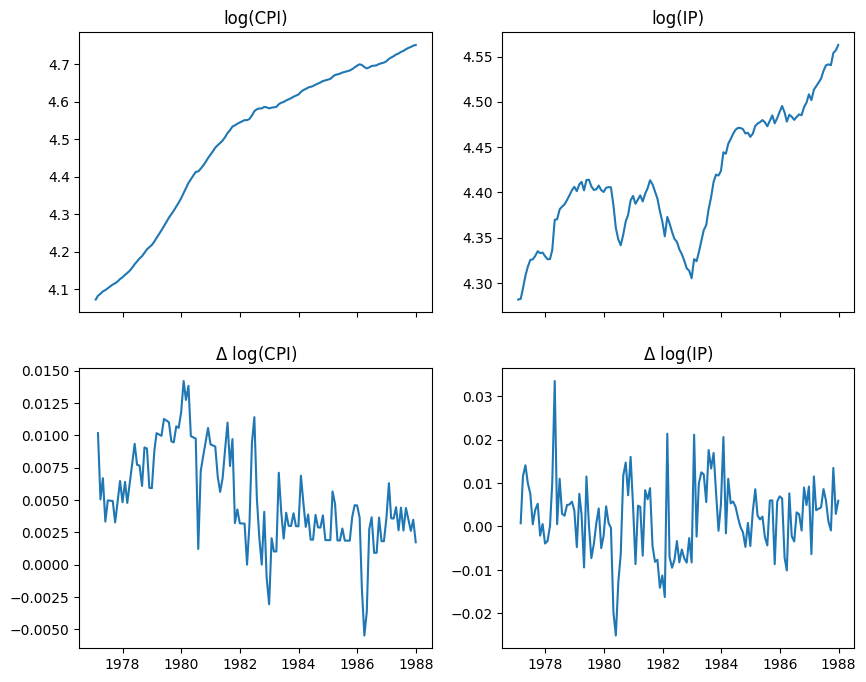

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True)

axs[0][0].plot(np.log(CPI['1977':'1987']));
axs[0][0].set_title('log(CPI)');

axs[0][1].plot(np.log(IP['1977':'1987']));
axs[0][1].set_title('log(IP)');

axs[1][0].plot(CPI_diff);
axs[1][0].set_title('$\\Delta$ log(CPI)');

axs[1][1].plot(IP_diff);
axs[1][1].set_title('$\\Delta$ log(IP)');

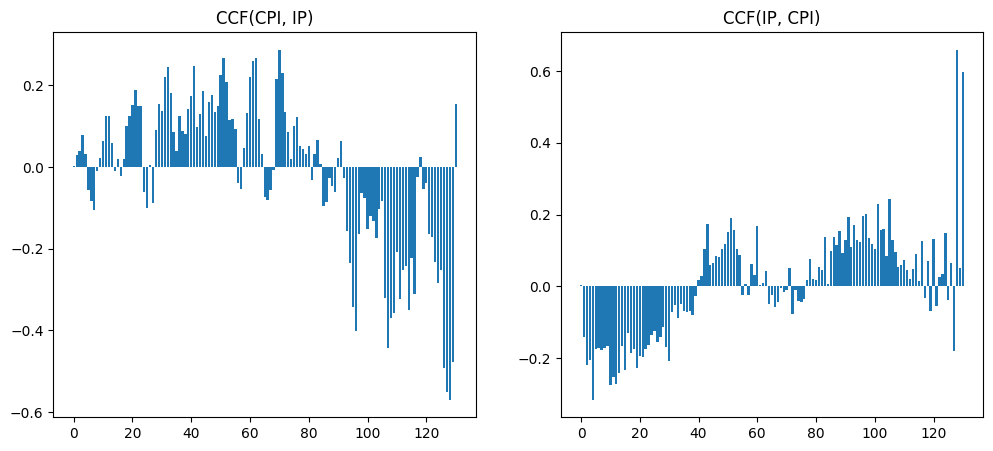

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(x=range(len(CPI_diff)), height=ccf(CPI_diff, IP_diff));
axs[0].set_title('CCF(CPI, IP)');
axs[1].bar(x=range(len(CPI_diff)), height=ccf(IP_diff, CPI_diff));
axs[1].set_title('CCF(IP, CPI)');

In [22]:
def ccf_r(x, y, lag_bounds=None):
    """Returns CCF values for positive and negative lags within the provided bounds (inclusive)"""
    assert len(x) == len(y)
    n = len(x)
    ccf_pos = ccf(x, y)
    ccf_neg = ccf(y, x)
    all_lags = np.concatenate([np.flip(ccf_neg[1:]), ccf_pos])
    if lag_bounds is None:
        return all_lags
    else:
        return all_lags[lag_bounds[0] + n - 1:lag_bounds[1] + n]

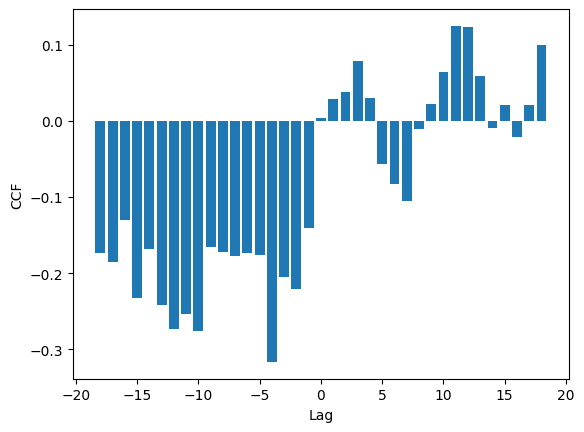

In [23]:
fig, ax = plt.subplots()
ax.bar(x=range(-18, 19), height=ccf_r(CPI_diff, IP_diff, lag_bounds=(-18, 18)));
ax.set_xlabel('Lag');
ax.set_ylabel('CCF');

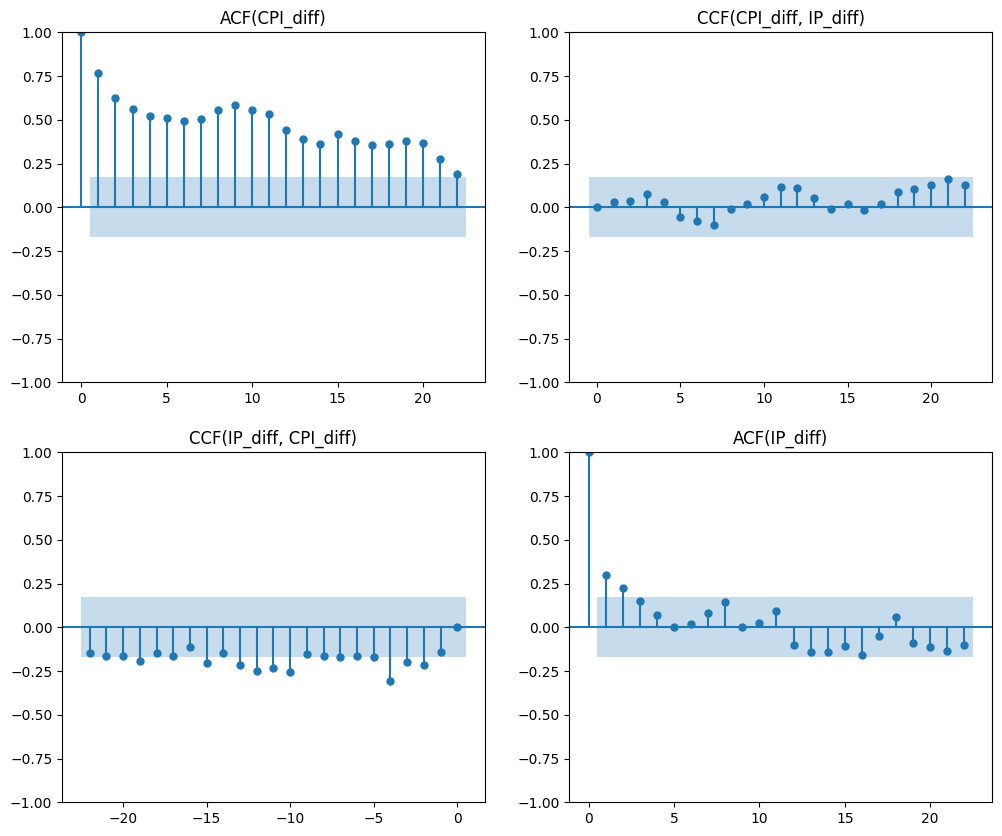

In [24]:
df = pd.DataFrame({'CPI_diff': np.squeeze(CPI_diff.values.T), 'IP_diff': np.squeeze(IP_diff.values.T)})

fig = plt.figure(figsize=(12, 10))
plot_accf_grid(df, fig=fig);

In [25]:
CPI_IP = np.hstack([CPI_diff.values, IP_diff.values])

In [26]:
with np_cv_rules.context():
    res = MTS.mq(CPI_IP, lag=10)
res

Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]   1.0      92.5     4.0        0
 [2,]   2.0     157.4     8.0        0
 [3,]   3.0     208.6    12.0        0
 [4,]   4.0     258.7    16.0        0
 [5,]   5.0     298.5    20.0        0
 [6,]   6.0     336.4    24.0        0
 [7,]   7.0     377.8    28.0        0
 [8,]   8.0     427.2    32.0        0
 [9,]   9.0     478.4    36.0        0
[10,]  10.0     532.5    40.0        0


<rpy2.rinterface_lib.sexp.NULLType object at 0x7f41e880c190> [0]

#### Example 13.10

In [27]:
with np_cv_rules.context():
    res = rstats.ar(CPI_IP, order_max=10)
res['aic']

array([127.99351863,   0.17412834,   1.28745331,   5.04570881,
         3.40092622,   0.        ,   6.8699559 ,   9.33067148,
        10.82561129,  13.19182792,  14.10873899])

In [28]:
with np_cv_rules.context():
    res1 = rstats.ar(CPI_IP, order_max=1)

In [29]:
res1['ar']

array([[[ 0.76727004,  0.01124642],
        [-0.3296211 ,  0.30138452]]])

In [30]:
res1['var.pred']

array([[5.67787852e-06, 3.32515137e-06],
       [3.32515137e-06, 6.73181082e-05]])

In [31]:
res1['x.mean']

array([0.00517985, 0.00214622])